In [1]:
import numpy as np
import matplotlib.pyplot as plt 
N_arr = [2,4,6,8,10,100,500,1000,1500,2000,2500]
pi = np.pi 
dt = 0.01
step_size = 10000
phases_minus_mean = [] 
std = 0 
w = 50 
Krc_arr = [] 

In [2]:
def calculate_phases(Kr, w, curr_phase,step_size, dt): 
    j = 0
    for t in range (0,step_size):    
        phase_mean = np.mean(curr_phase)  
        for i in range (0,len(curr_phase)): 
            curr_phase[i] += w + dt * Kr * np.sin(phase_mean-curr_phase[i]) 
    phases_minus_mean = curr_phase - np.mean(curr_phase) 
    while j < len(curr_phase): 
        if phases_minus_mean[j] > pi or phases_minus_mean[j] < -pi: 
            curr_phase = np.delete(curr_phase,j,None)
            phases_minus_mean = np.delete(phases_minus_mean,j,None)
        j+=1 
    return curr_phase 

In [3]:
def determine_synchronize(Kr,w,curr_phase,step_size, dt): 
    synchro = False 
    curr_phase = calculate_phases(Kr, w, curr_phase, step_size, dt) 
    std = np.std(curr_phase) 
    if std < 10**-3: 
        synchro = True 
        print("The fireflies eventually synchronize with Kr value "+str(Kr)+" and natural frequency " +str(w)+".") 
    else: 
        print("The fireflies are not synchronized with Kr value "+str(Kr)+" and natural frequency " +str(w)+".") 
    return synchro 

In [4]:
def trial_synchro(i): 
    b=0.08
    while b < 1.0: 
        curr_phase = np.random.uniform(-pi,pi,N_arr[i]) 
        synchro = determine_synchronize(b,w, curr_phase ,step_size, dt)
        if synchro == True: 
            print("The critical value for Kr is approximately: "+str(b)+".")
            break 
        b+=0.001
    return b

In [5]:
for i in range(len(N_arr)):  
    Krc =  trial_synchro(i) 
    Krc_arr.append(Krc)

The fireflies eventually synchronize with Kr value 0.08 and natural frequency 50.
The critical value for Kr is approximately: 0.08.
The fireflies eventually synchronize with Kr value 0.08 and natural frequency 50.
The critical value for Kr is approximately: 0.08.
The fireflies eventually synchronize with Kr value 0.08 and natural frequency 50.
The critical value for Kr is approximately: 0.08.
The fireflies eventually synchronize with Kr value 0.08 and natural frequency 50.
The critical value for Kr is approximately: 0.08.
The fireflies are not synchronized with Kr value 0.08 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.081 and natural frequency 50.
The critical value for Kr is approximately: 0.081.
The fireflies are not synchronized with Kr value 0.08 and natural frequency 50.
The fireflies are not synchronized with Kr value 0.081 and natural frequency 50.
The fireflies are not synchronized with Kr value 0.082 and natural frequency 50.
The fireflies ar

[2, 4, 6, 8, 10, 100, 500, 1000, 1500, 2000, 2500]


Text(0, 0.5, 'Critical Value for Kr')

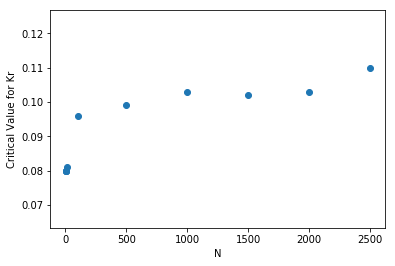

In [7]:
print(N_arr)
plt.scatter(N_arr, Krc_arr) 
plt.xlabel('N')
plt.ylabel('Critical Value for Kr') 